<div align="center">
    <img src="https://raw.githubusercontent.com/YanChyi/Data-Analyst-Portfolio-Projects/main/Stack%20Overflow%20Developer%20Survey%202019/Images/Cover%20Image.JPG" width="800" alt="Cover Image"/>
</div>

# Descriptive Analytics on the Stack Overflow Developer Survey 2019 Data

by **Koh Yan Chyi**

June 18, 2022

*Note: This project is based on the __IBM Data Analyst Capstone Project__ submitted to Coursera to fulfill the requirements for the __IBM Data Analyst Professional Certificate__*<br>

## Overview

This descriptive analysis is examined the data collected from the Stack Overflow Developer Survey 2019. A randomized subset of the 2019 original dataset (approximately 10% of the original dataset; sample size, *N* = 11,552) was explored, analyzed, and visualized by using ***Python, SQL*** and ***Tableau***. 

The results showed the following insights: 
 - Most popular programming languages, databases, platforms, and web frames (at the time of data collection)
 - Future technology trends
 - Demographics among developers

These insights provide a snapshot of the programming community and can serve as a guideline for the 
- current developers who are aiming to remain competitive
- students who are studying in this field
- businesses who are deciding to upskill their workers and establish hiring strategies
- educators who are planning to roll out the relevant courses to their students
<br><br>

## Table of Contents

<div class="alert alert-block alert-info">

1. <a href='#1.-Introduction'>Introduction</a><br><br>

    
2. <a href='#2.-Import-the-Required-Libraries'>Import the Required Libraries</a><br><br>

    
3. <a href='#3.-Dataset-Exploration'>Dataset Exploration</a><br>
    * 3.1 <a href='#3.1-Loading-the-Dataset'>Loading the Dataset</a><br>
    * 3.2 <a href='#3.2-Exploring-the-Dataset'>Exploring the Dataset</a><br><br>

    
4. <a href='#4.-Data-Wrangling'>Data Wrangling</a><br>
    * 4.1 <a href='#4.1-Identifying-and-Removing-Duplicates'>Identifying and Removing Duplicates</a><br>
    * 4.2 <a href='#4.2-Finding-and-Imputing-Missing-Values'>Finding and Imputing Missing Values</a><br>
    * 4.3 <a href='#4.3-Normalizing-Data'>Normalizing Data</a><br><br>

    
5. <a href='#5.-Exploratory-Data-Analysis-(EDA)'>Exploratory Data Analysis (EDA)</a><br>
    * 5.1 <a href='#5.1-Identifying-the-Distribution-of-Data'>Identifying the Distribution of Data</a><br>
    &emsp;&emsp;5.1.1 <a href='#5.1.1-Annual-USD-Salary-Distribution'>Annual USD Salary Distribution</a><br>
    &emsp;&emsp;5.1.2 <a href='#5.1.2-Gender-and-Age-Distribution'>Gender and Age Distribution</a><br>
    * 5.2 <a href='#5.2-Identifying-and-Removing-Outliers'>Identifying and Removing Outliers</a><br>
    * 5.3 <a href='#5.3-Identifying-Correlation-Between-Features'>Identifying Correlation Between Features</a><br><br>


6. <a href='#6.-Data-Visualization-Part-I'>Data Visualization Part I</a><br>
    * 6.1 <a href='#6.1-Data-Extraction-using-SQL'>Data Extraction using SQL</a><br>
    * 6.2 <a href='#6.2-Visualizations'>Visualizations</a><br>
    &emsp;&emsp;6.2.1 <a href='#6.2.1-Visualizing-Distribution-of-Data:-Box-Plot'>Visualizing Distribution of Data: Box Plot</a><br>
    &emsp;&emsp;6.2.2 <a href='#6.2.2-Visualizing-Relationship-Between-Two-Features:-Scatter-Plot-and-Bubble-Plot'>Visualizing Relationship Between Two Features: Scatter Plot and Bubble Plot</a><br>
    &emsp;&emsp;6.2.3 <a href='#6.2.3-Visualizing-Composition-of-Data:-Pie-Chart-and-Stacked-Chart'>Visualizing Composition of Data: Pie Chart and Stacked Chart</a><br>
    &emsp;&emsp;6.2.4 <a href='#6.2.4-Visualizing-Comparison-of-Data:-Line-Chart-and-Bar-Chart'>Visualizing Comparison of Data: Line Chart and Bar Chart</a><br><br>

    
7. <a href='#7.-Data-Visualization-Part-II:-Tableau-Dashboard'>Data Visualization Part II: Tableau Dashboard</a><br><br>

    
8. <a href='#8.-Data-Visualization-Part-III:-Data-from-Other-Sources'>Data Visualization Part III: Data from Other Sources</a><br>
    * 8.1 <a href='#8.1-Collecting-Job-Postings-Data-using-Jobs-API'>Collecting Job Postings Data using Jobs API</a><br>
    * 8.2 <a href='#8.2-Web-Scraping-the-Popular-Programming-Languages-and-Respective-Salaries-Data'>Web Scraping the Popular Programming Languages and Respective Salaries Data</a><br><br>
   
9. <a href='#9.-Findings-and-Implications'>Findings and Implications</a><br><br>
</div>

<br>

## 1. Introduction

Stack Overflow, a popular website for developers, conducted an online survey of software professionals across the world. The objective of the annual survey is to gather data from developers regarding how they learn and work, their salaries, languages, tools, and technologies they use. 

The dataset used in this project comes from the following source: __[Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey/)__ under an __[ODbL: Open Database License](https://opendatacommons.org/licenses/odbl/1-0/)__.

In this analysis, a randomized subset of the 2019 original dataset (sample dataset, *N* = 11,552; original dataset, *N* ≈ 90,000) was explored, analyzed, and visualized. The key findings are summarized in the following Tableau dashboard: __[Link to Tableau dashboard](https://public.tableau.com/app/profile/yan.chyi/viz/DataVisualizationPartIICurrentTechnologyUsageFutureTechnologyTrendDemographicsofRespondents/CurrentTechnologyUsage)__

Target audience: Developers, Students, Businesses that plan to hire IT professionals, Educators <br><br>

## 2. Import the Required Libraries

Import all the required libraries for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import urllib.request
import sqlite3
import requests
import json
import openpyxl
from openpyxl import Workbook
from bs4 import BeautifulSoup

# use the inline backend to generate the plots within the browser
%matplotlib inline

# For ggplot-like style
mpl.style.use('ggplot')  

<br>

## 3. Dataset Exploration

### 3.1 Loading the Dataset

Load the dataset using the URL provided by IBM into a dataframe.

In [2]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

df = pd.read_csv(dataset_url)

<br>

### 3.2 Exploring the Dataset

Top 5 rows and columns from dataset.

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


Explore the shape of dataset.

In [4]:
df.shape

(11552, 85)

Identify the data types of each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

Mean age of the survey participants.

In [6]:
df['Age'].mean()

30.77239449133718

Number of unique countries in the `Country` column.

In [7]:
df['Country'].nunique()

135

<br>

## 4. Data Wrangling

### 4.1 Identifying and Removing Duplicates

Find the number of duplicate rows that exist in the dataframe.

In [8]:
df.duplicated().value_counts()

False    11398
True       154
dtype: int64

Remove the duplicate rows from the dataframe.

In [9]:
df.drop_duplicates(inplace=True)

Verify that all duplicates were dropped.

In [10]:
df.duplicated().value_counts()

False    11398
dtype: int64

<br>

### 4.2 Finding and Imputing Missing Values

Find the number of missing values for all columns.

In [11]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts(),'\n')

Respondent
False    11398
Name: Respondent, dtype: int64 

MainBranch
False    11398
Name: MainBranch, dtype: int64 

Hobbyist
False    11398
Name: Hobbyist, dtype: int64 

OpenSourcer
False    11398
Name: OpenSourcer, dtype: int64 

OpenSource
False    11317
True        81
Name: OpenSource, dtype: int64 

Employment
False    11398
Name: Employment, dtype: int64 

Country
False    11398
Name: Country, dtype: int64 

Student
False    11347
True        51
Name: Student, dtype: int64 

EdLevel
False    11286
True       112
Name: EdLevel, dtype: int64 

UndergradMajor
False    10661
True       737
Name: UndergradMajor, dtype: int64 

EduOther
False    11234
True       164
Name: EduOther, dtype: int64 

OrgSize
False    11302
True        96
Name: OrgSize, dtype: int64 

DevType
False    11333
True        65
Name: DevType, dtype: int64 

YearsCode
False    11389
True         9
Name: YearsCode, dtype: int64 

Age1stCode
False    11385
True        13
Name: Age1stCode, dtype: int64 

YearsCodeP

Column `WorkLoc` (Work Location) is getting attention after computing the missing value. As shown above, `WorkLoc` has 32 missing values. Dive into the `WorkLoc` and impute the missing value.

Value counts for the column `WorkLoc`.

In [12]:
df['WorkLoc'].value_counts(dropna=False)

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
NaN                                                 32
Name: WorkLoc, dtype: int64

Identify the most frequent value (majority) in the `WorkLoc` column.

In [13]:
most_frequent_value = df['WorkLoc'].mode()[0]
most_frequent_value

'Office'

Impute all the empty rows in the `WorkLoc` column with most_frequent_value.

In [14]:
df['WorkLoc'].replace(np.nan, most_frequent_value, inplace=True)

Verify if imputing was successful.

In [15]:
df['WorkLoc'].isnull().sum()

0

New value counts for the `WorkLoc` column.

In [16]:
df['WorkLoc'].value_counts(dropna=False)

Office                                            6838
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

<br>

### 4.3 Normalizing Data

There are two columns in the dataset that talk about compensation.

1. `CompFreq` (Frequency of Compensation)
    <br>This column shows how often a respondent was paid (Yearly, Monthly, Weekly).
    <br>
    
2.  `CompTotal` (Total Compensation) 
    <br>This column talks about amount of compensation the respondent was paid per Year, Month, or Week depending upon his/her `CompFreq`.
    <br>

This makes it difficult to compare the total compensation of the respondents. Therefore, a new column called `NormalizedAnnualCompensation` is created which contains the respondents' annual compensation irrespective of the `CompFreq`. This `NormalizedAnnualCompensation` column makes the comparison of salaries easy.<br><br>

Various categories in the column `CompFreq`

In [17]:
df['CompFreq'].value_counts()

Yearly     6073
Monthly    4788
Weekly      331
Name: CompFreq, dtype: int64

Create a new column named `NormalizedAnnualCompensation`.

In [18]:
def normalize(freq, comp):
    
    result = 0
    
    if freq == 'Yearly':
        result = comp

    elif freq == 'Monthly':
        result = comp * 12
    
    elif freq == 'Weekly':
        result = comp * 52
    
    else:
        result = comp
    
    return result

df['NormalizedAnnualCompensation'] = df.apply(lambda row: normalize(row['CompFreq'], row['CompTotal']), axis=1)

<br>

## 5. Exploratory Data Analysis (EDA)

In this EDA, we focus on analyzing respondents' **compensation**, **gender**, and **age**.<br>

### 5.1 Identifying the Distribution of Data

#### 5.1.1 Annual USD Salary Distribution

The column `ConvertedComp` contains respondents' salaries converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.

Distribution curve for the column `ConvertedComp`.

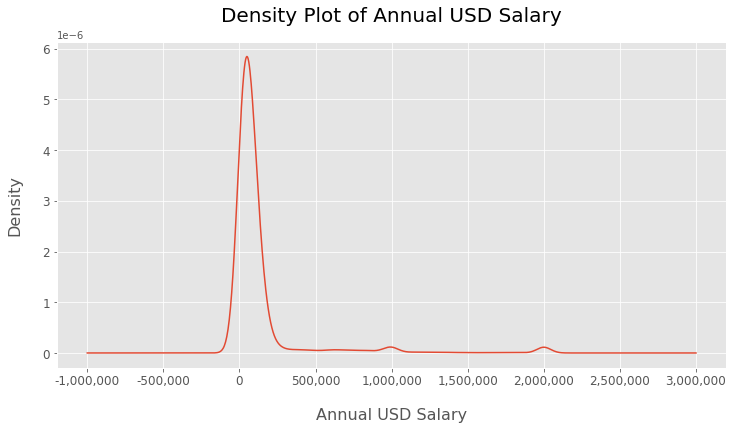

In [19]:
# Plot the KDE
fig, ax = plt.subplots(figsize=(12,6))

ax = df['ConvertedComp'].plot(kind='kde')

ax.set_title('Density Plot of Annual USD Salary', fontsize=20, pad=20)
ax.set_xlabel('Annual USD Salary', fontsize=16, labelpad=20)
ax.set_ylabel('Density', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

Histogram for the column `ConvertedComp`.

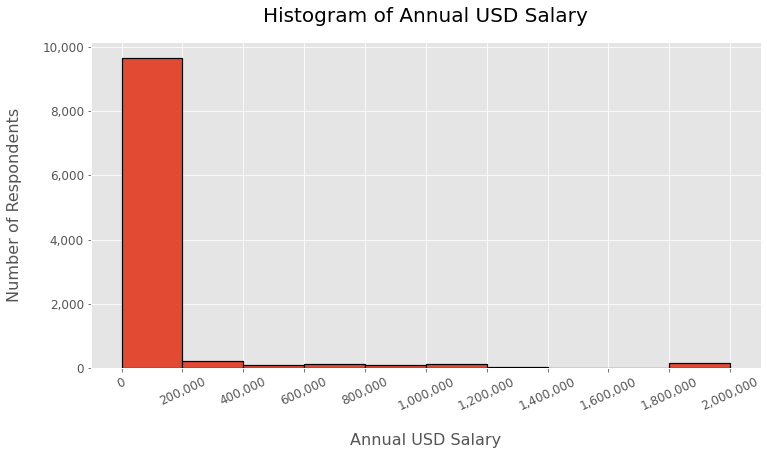

In [20]:
# Get the bin ranges and frequency counts
count, bin_edges = np.histogram(df['ConvertedComp'].dropna())

# Plot the histogram
fig, ax = plt.subplots(figsize=(12,6))

ax = df['ConvertedComp'].plot(kind='hist', 
                              xticks=bin_edges, 
                              edgecolor='black', 
                              linewidth=1.2)

ax.set_title('Histogram of Annual USD Salary', fontsize=20, pad=20)
ax.set_xlabel('Annual USD Salary', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Respondents', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(labels=bin_edges, rotation=25)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

Median of the column `ConvertedComp`.

In [21]:
df['ConvertedComp'].median()

57745.0

#### 5.1.2 Gender and Age Distribution

Gender distribution among men and women.

In [22]:
# Number of respondents identified themselves only as Man or Woman
df['Gender'].value_counts().loc[['Man', 'Woman']]

Man      10480
Woman      731
Name: Gender, dtype: int64

Median `ConvertedComp` of men and women.

In [23]:
# Median Annual USD Salary of responders identified themselves only as Man or Woman.
df.groupby('Gender')['ConvertedComp'].median().loc[['Man', 'Woman']]

Gender
Man      57744.0
Woman    57708.0
Name: ConvertedComp, dtype: float64

Although there is a high gender gap between the men and women respondents, the median salary of men and women is almost the same.<br>

Age distribution among respondents.

In [24]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Histogram of the column `Age`.

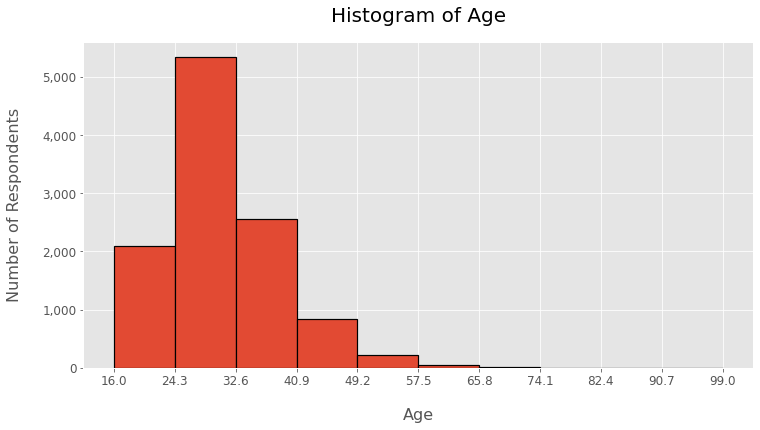

In [25]:
# Get the bin ranges and frequency counts
count, bin_edges = np.histogram(df['Age'].dropna())

# Plot the histogram
fig, ax = plt.subplots(figsize=(12,6))

ax = df['Age'].plot(kind='hist',
                    xticks=bin_edges,
                    edgecolor='black',
                    linewidth=1.2)

ax.set_title('Histogram of Age', fontsize=20, pad=20)
ax.set_xlabel('Age', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Respondents', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

<br>

### 5.2 Identifying and Removing Outliers

Find out if outliers exist in the column `ConvertedComp` using a box plot.

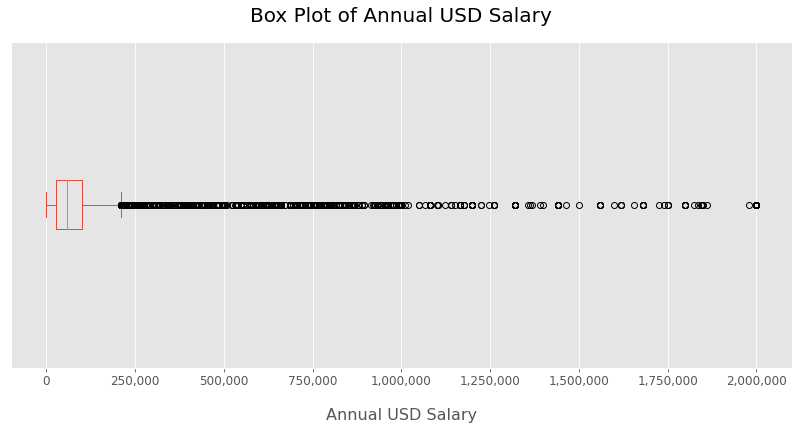

In [26]:
# Plot the box plot
fig, ax = plt.subplots(figsize=(14,6))

ax = df['ConvertedComp'].plot(kind='box', vert=False)

ax.set_title('Box Plot of Annual USD Salary', fontsize=20, pad=20)
ax.set_xlabel('Annual USD Salary', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_visible(False)

plt.show()

Interquartile range for the column `ConvertedComp`.

In [27]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print('The interquartile range is', IQR)

The interquartile range is 73132.0


Number of outliers in the `ConvertedComp` column.

In [28]:
# Upper and lower bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Condition for detecting outliers
outliers_condition = (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)

# Number of outliers
df['ConvertedComp'][outliers_condition].count()

879

Remove the outliers from the `ConvertedComp` column.

In [29]:
df = df[~ outliers_condition]

Verify that all outliers in the `ConvertedComp` column were removed.

In [30]:
df['ConvertedComp'][outliers_condition].count()

0

<br><br>
**Checking the Annual USD Salary distribution after removing outliers.**

New distribution curve for the column `ConvertedComp`.

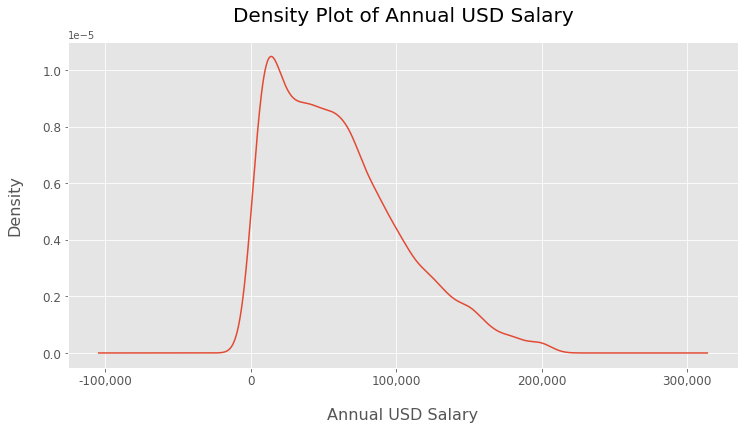

In [31]:
# Plot the KDE
fig, ax = plt.subplots(figsize=(12,6))

ax = df['ConvertedComp'].plot(kind='kde')

ax.set_title('Density Plot of Annual USD Salary', fontsize=20, pad=20)
ax.set_xlabel('Annual USD Salary', fontsize=16, labelpad=20)
ax.set_ylabel('Density', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

New histogram for the column `ConvertedComp`.

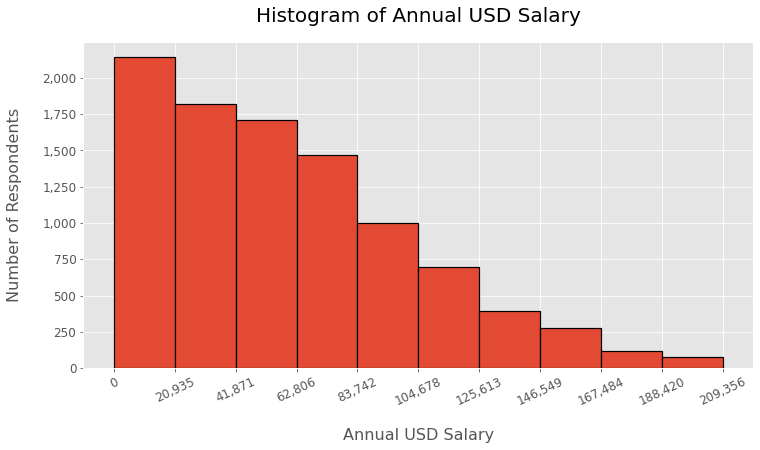

In [32]:
# Get the bin ranges and frequency counts
count, bin_edges = np.histogram(df['ConvertedComp'].dropna())

# Plot the histogram
fig, ax = plt.subplots(figsize=(12,6))

ax = df['ConvertedComp'].plot(kind='hist',
                              xticks=bin_edges,
                              edgecolor='black',
                              linewidth=1.2)

ax.set_title('Histogram of Annual USD Salary', fontsize=20, pad=20)
ax.set_xlabel('Annual USD Salary', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Respondents', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.set_xticklabels(labels=bin_edges, rotation=25)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

New median of the column `ConvertedComp`.

In [33]:
df['ConvertedComp'].median()

52704.0

Compare the new median `ConvertedComp` of men and women.

In [34]:
df.groupby('Gender')['ConvertedComp'].median().loc[['Man', 'Woman']]

Gender
Man      52339.0
Woman    54956.0
Name: ConvertedComp, dtype: float64

After removing outliers, the median salary of women is slightly higher than men.
<br>
<br>

### 5.3 Identifying Correlation Between Features

Find the correlation between `Age` and all other numerical columns.

In [35]:
df.corr()[['Age']]

,Age
Respondent,0.003950
CompTotal,0.006371
ConvertedComp,0.401821
WorkWeekHrs,0.037452
CodeRevHrs,-0.017961
Age,1.000000
NormalizedAnnualCompensation,-0.016317


There is a positive correlation between `ConvertedComp` and `Age` (r = 0.401821).
<br>
<br>

**Plotting regplot to demonstrate the relationship between `ConvertedComp` and `Age`.**

Create a new dataframe of median `ConvertedComp` group by `Age`.

In [36]:
new_df = df.groupby('Age').median()
new_df.reset_index(inplace=True)
new_df.head()

,Age,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,NormalizedAnnualCompensation
0,16.0,10544.0,1000.0,8700.0,40.0,1.0,12000.0
1,17.0,18897.5,2250.0,43550.5,26.0,2.0,55980.0
2,18.0,7580.0,15000.0,20936.0,35.0,3.0,21600.0
3,19.0,11362.0,4550.0,17850.0,40.0,3.0,36200.0
4,20.0,12234.0,8500.0,17820.0,40.0,3.0,26074.0


Regplot of median `ConvertedComp` and `Age`.

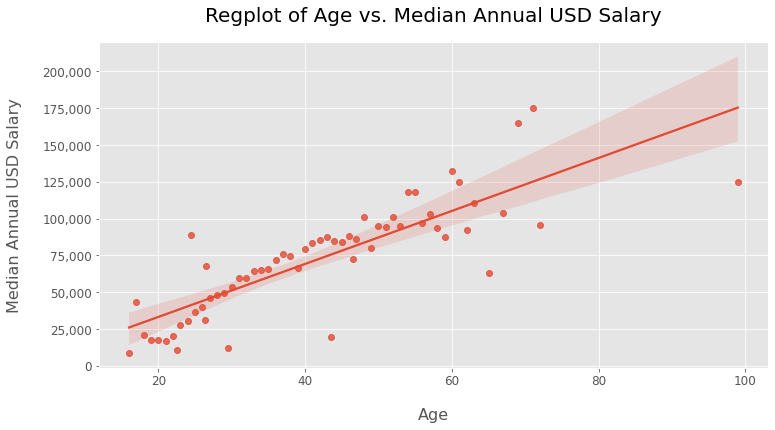

In [37]:
# Plot the regplot
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.regplot(x="Age", y="ConvertedComp", data=new_df)

ax.set_title('Regplot of Age vs. Median Annual USD Salary', fontsize=20, pad=20)
ax.set_xlabel('Age', fontsize=16, labelpad=20)
ax.set_ylabel('Median Annual USD Salary', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

As the age goes up, the median annual USD salary goes up. This indicates a positive relationship between these two variables, thus consistent with the correlation (r = 0.401821) computed above.
<br>
<br>

## 6. Data Visualization Part I

In this data visualization, we focus on the **age, work week hours, code review hours, current and future trends of programming languages and database usage, annual salary,** and **main branch of respondents**.

The cleaned dataset is provided by IBM in the form of a RDBMS. 

We use SQL queries to extract the data.<br>

### 6.1 Data Extraction using SQL 

Download database file.

In [38]:
urllib.request.urlretrieve('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite', 'm4_survey_data.sqlite')

('m4_survey_data.sqlite', <http.client.HTTPMessage at 0x20676130b80>)

Connect to the database.

In [39]:
# Open a database connection
conn = sqlite3.connect("m4_survey_data.sqlite")

List of tables in the database.

In [40]:
# SQL Query
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
# Create dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


Number of rows in the `master` table.

In [41]:
# SQL Query
QUERY = """
SELECT COUNT(*) as Row_Number
FROM master
"""

# Create dataframe
df_master = pd.read_sql_query(QUERY,conn)
df_master.head()

,Row_Number
0,11398


<br>

### 6.2 Visualizations

#### 6.2.1 Visualizing Distribution of Data: Box Plot

Box plot of `Age`.

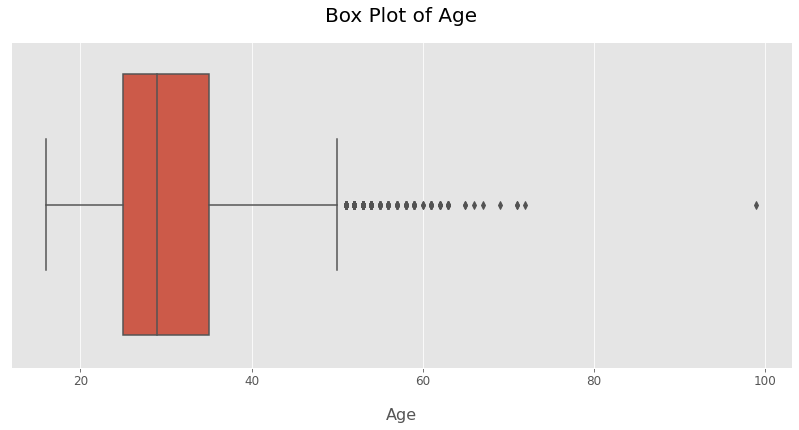

In [42]:
# SQL Query
QUERY = """
SELECT Age 
FROM master
"""
# Create dataframe
df_Age = pd.read_sql_query(QUERY, conn)

# Plot the box plot
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.boxplot(x='Age', data=df_Age, orient='h')

ax.set_title('Box Plot of Age', fontsize=20, pad=20)
ax.set_xlabel('Age', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_visible(False)

plt.show()

<br>

#### 6.2.2 Visualizing Relationship Between Two Features: Scatter Plot and Bubble Plot

Scatter plot of `Age` and `WorkWeekHrs`.

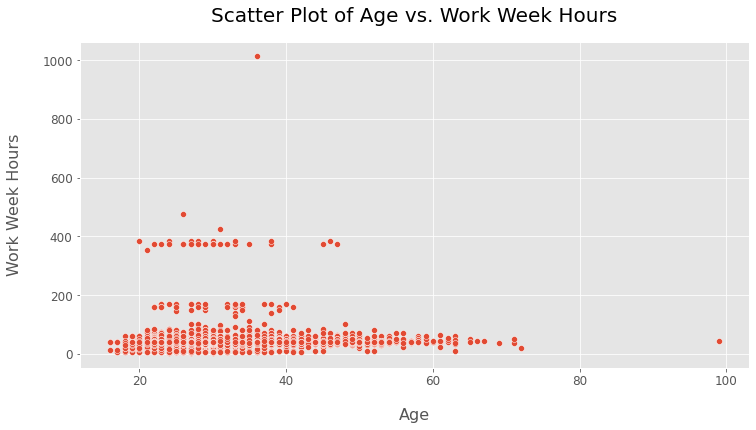

In [43]:
# SQL Query
QUERY = """
SELECT 
    Age, 
    WorkWeekHrs 
FROM master
"""
# Create dataframe
df_Age_WorkWeekHrs = pd.read_sql_query(QUERY, conn)

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.scatterplot(x='Age', y='WorkWeekHrs', data=df_Age_WorkWeekHrs)

ax.set_title('Scatter Plot of Age vs. Work Week Hours', fontsize=20, pad=20)
ax.set_xlabel('Age', fontsize=16, labelpad=20)
ax.set_ylabel('Work Week Hours', fontsize=16, labelpad=20)
ax.tick_params(axis='both', labelsize=12)

plt.show()

<br>

Bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` as bubble size.

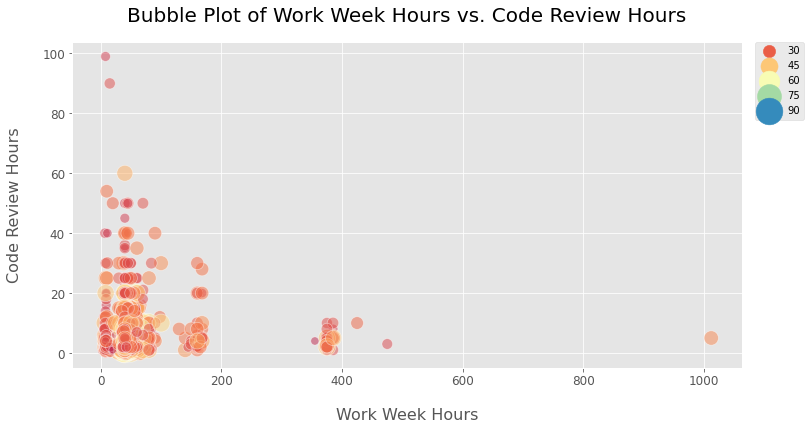

In [44]:
# SQL Query
QUERY = """
SELECT 
    Age, 
    WorkWeekHrs, 
    CodeRevHrs 
FROM master
"""
# Create dataframe
df_Work_Code_Age = pd.read_sql_query(QUERY, conn)

# Plot the bubble plot
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.scatterplot(x='WorkWeekHrs', 
                     y='CodeRevHrs', 
                     data=df_Work_Code_Age, 
                     size='Age',
                     sizes=(20,800),
                     hue='Age',
                     alpha=0.5, 
                     palette="Spectral",
                     color='red')

ax.set_title('Bubble Plot of Work Week Hours vs. Code Review Hours', fontsize=20, pad=20)
ax.set_xlabel('Work Week Hours', fontsize=16, labelpad=20)
ax.set_ylabel('Code Review Hours', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.show()

<br>

#### 6.2.3 Visualizing Composition of Data: Pie Chart and Stacked Chart

Pie chart of top 5 databases that respondents currently worked with and wish to learn next year.

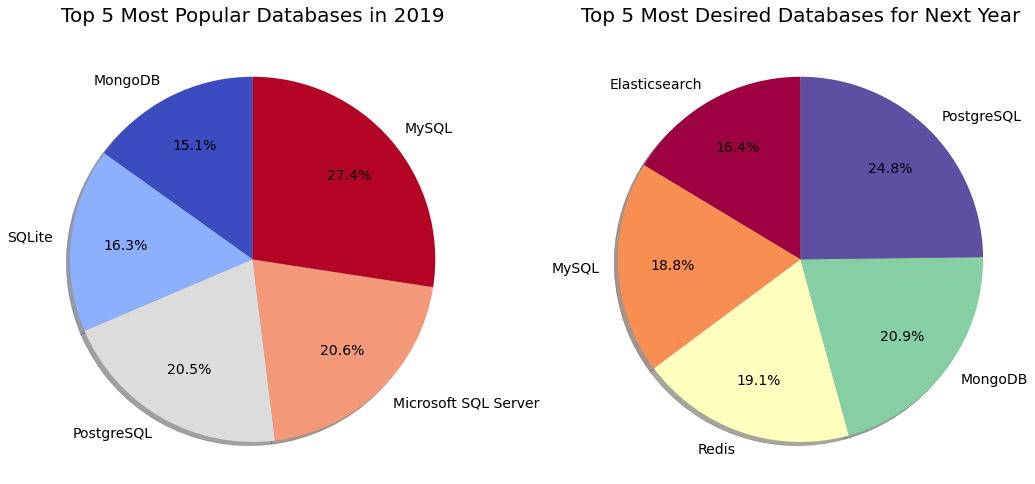

In [45]:
# SQL Query

# Top 5 Databases Currently Worked With
QUERY1 = """
SELECT 
    DatabaseWorkedWith, 
    COUNT(DatabaseWorkedWith) AS Number_of_Respondents
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
ORDER BY Number_of_Respondents DESC
LIMIT 5
"""

# Top 5 Databases Wish to Learn Next Year
QUERY2 = """
SELECT 
    DatabaseDesireNextYear, 
    COUNT(DatabaseDesireNextYear) AS Number_of_Respondents
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Number_of_Respondents DESC
LIMIT 5
"""


# Create dataframe

# Dataframe 1: Top 5 Databases Currently Worked With
df_top5_database_current = pd.read_sql_query(QUERY1, conn)
df_top5_database_current.set_index('DatabaseWorkedWith', inplace=True)
df_top5_database_current.sort_values(by='Number_of_Respondents', inplace=True)

# Dataframe 2: Top 5 Databases Wish to Learn Next Year
df_top5_database_future = pd.read_sql_query(QUERY2, conn)
df_top5_database_future.set_index('DatabaseDesireNextYear', inplace=True)
df_top5_database_future.sort_values(by='Number_of_Respondents', inplace=True)


# Plot the Pie Chart
fig = plt.figure(figsize=(18,8))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


# Subplot 1: Bar Chart
df_top5_database_current['Number_of_Respondents'].plot(kind='pie',
                                                       autopct='%1.1f%%',
                                                       startangle=90,
                                                       shadow=True,
                                                       labels=df_top5_database_current.index,
                                                       pctdistance=0.70,
                                                       legend=None,
                                                       fontsize=14, colormap='coolwarm',
                                                       ax=ax0)

ax0.set_title('Top 5 Most Popular Databases in 2019', fontsize=20, pad=20)
ax0.set_aspect('equal', adjustable='datalim')
ax0.get_yaxis().set_visible(False)


# Subplot 2: Pie Chart
df_top5_database_future['Number_of_Respondents'].plot(kind='pie',
                                                      autopct='%1.1f%%',
                                                      startangle=90,
                                                      shadow=True,
                                                      labels=df_top5_database_future.index,
                                                      pctdistance=0.70,
                                                      legend=None,
                                                      fontsize=14,
                                                      colormap='Spectral',
                                                      ax=ax1)

ax1.set_title('Top 5 Most Desired Databases for Next Year', fontsize=20, pad=20)
ax1.set_aspect('equal', adjustable='datalim')
ax1.get_yaxis().set_visible(False)

plt.show()

<br>

Stacked chart of mean `WorkWeekHrs` and `CodeRevHrs` for respondents aged 30 to 35.

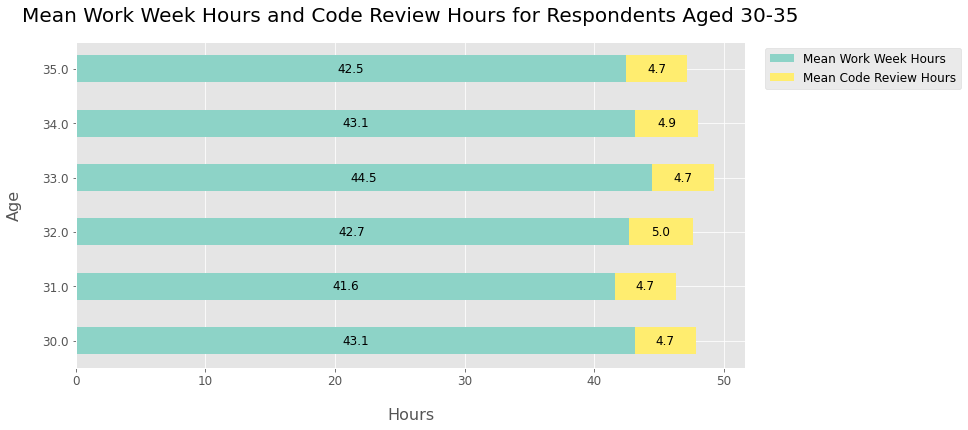

In [46]:
# SQL Query
QUERY = """
SELECT 
    Age, 
    AVG(WorkWeekHrs) AS mean_WorkWeekHrs, 
    AVG(CodeRevHrs) AS mean_CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
"""
# Create dataframe
df_Work_Code_Age_mean = pd.read_sql_query(QUERY, conn)
df_Work_Code_Age_mean.set_index('Age', inplace=True)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12,6))

df_Work_Code_Age_mean.plot(kind='barh', stacked=True, colormap='Set3', ax=ax)

ax.set_title('Mean Work Week Hours and Code Review Hours for Respondents Aged 30-35', fontsize=20, pad=20)
ax.set_xlabel('Hours', fontsize=16, labelpad=20)
ax.set_ylabel('Age', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.legend(labels=['Mean Work Week Hours','Mean Code Review Hours'], bbox_to_anchor=(1.02, 1), fontsize=12)

# Add value labels inside the bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    labels = f'{round(width,1):,}'
    
    x_position = x + width / 2
    y_position = y + height / 2
    ax.text(x_position, y_position, labels, ha='center', va='center', fontsize=12, color='black')
    

plt.show()

<br>

#### 6.2.4 Visualizing Comparison of Data: Line Chart and Bar Chart

Line chart of median `ConvertedComp` for respondents aged 45 to 60.

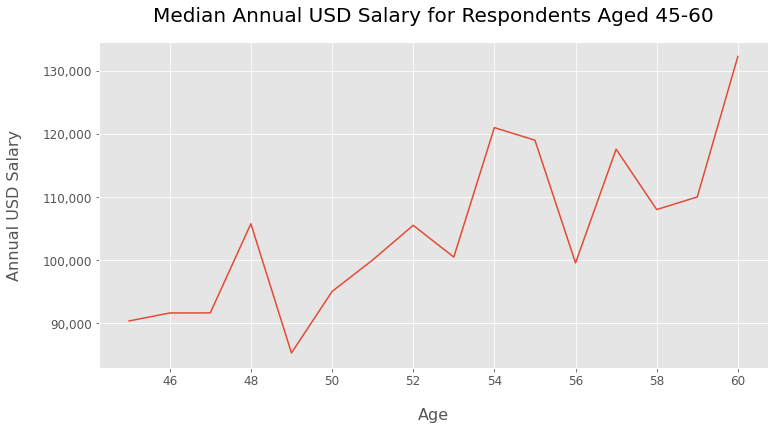

In [47]:
# SQL Query
QUERY = """
SELECT 
    Age, 
    ConvertedComp 
FROM master
WHERE Age BETWEEN 45 AND 60
"""

# Create dataframe
df_Age_Salary = pd.read_sql_query(QUERY, conn)

df_group = df_Age_Salary.groupby('Age').median()

# Plot the line chart
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.lineplot(x='Age', y='ConvertedComp', data=df_group, legend=None)

ax.set_title('Median Annual USD Salary for Respondents Aged 45-60', fontsize=20, pad=20)
ax.set_xlabel('Age', fontsize=16, labelpad=20)
ax.set_ylabel('Annual USD Salary', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

<br>

Bar chart of top 5 programming languages that respondents currently worked with.

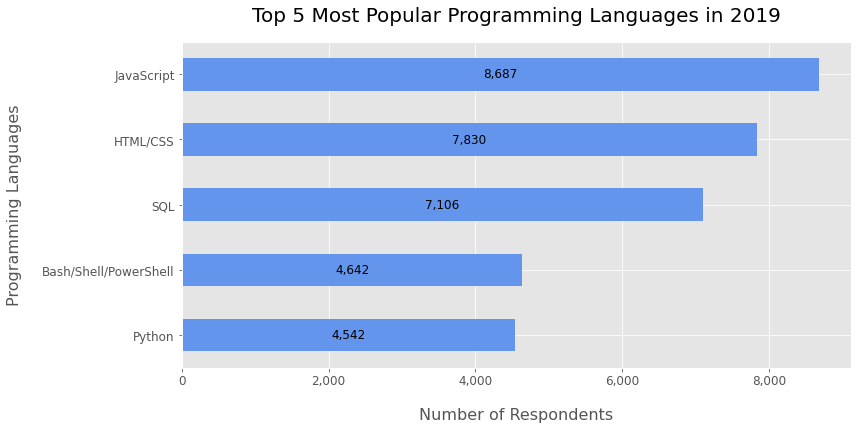

In [48]:
# SQL Query

# Top 5 Programming Languages Currently Worked With
QUERY = """
SELECT 
    LanguageWorkedWith, 
    COUNT(LanguageWorkedWith) AS Number_of_Respondents
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY Number_of_Respondents DESC
LIMIT 5
"""

# Create dataframe
df_top5_language_current = pd.read_sql_query(QUERY, conn)
df_top5_language_current.set_index('LanguageWorkedWith', inplace=True)
df_top5_language_current.sort_values(by='Number_of_Respondents', inplace=True)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,6))

df_top5_language_current['Number_of_Respondents'].plot(kind='barh', legend=None, color='cornflowerblue', ax=ax)

ax.set_title('Top 5 Most Popular Programming Languages in 2019', fontsize=20, pad=20)
ax.set_xlabel('Number of Respondents', fontsize=16, labelpad=20)
ax.set_ylabel('Programming Languages', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add value labels inside the bars
i = 0    
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    labels = f"{df_top5_language_current['Number_of_Respondents'][i]:,}"
    
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, labels, ha='center', va='center', fontsize=12, color='black')
    i += 1

plt.show()

<br>

Bar chart of top 5 programming languages that respondents wish to learn next year.

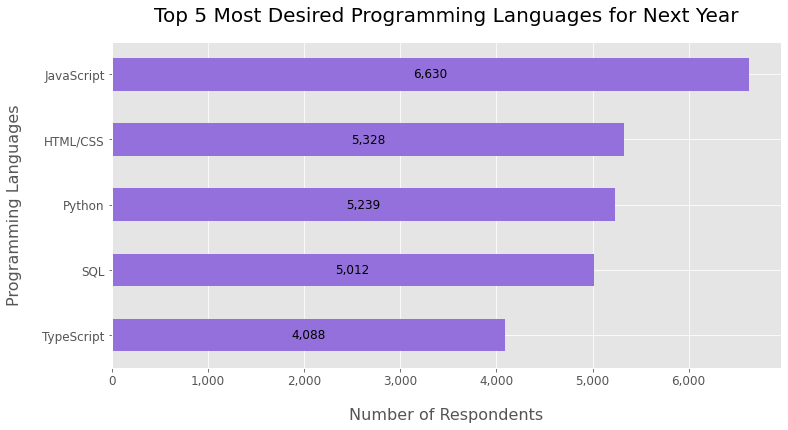

In [49]:
# SQL Query

# Top 5 Languages Wish to Learn Next Year
QUERY = """
SELECT 
    LanguageDesireNextYear, 
    COUNT(LanguageDesireNextYear) AS Number_of_Respondents
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Number_of_Respondents DESC
LIMIT 5
"""

# Create dataframe
df_top5_language_future = pd.read_sql_query(QUERY, conn)
df_top5_language_future.set_index('LanguageDesireNextYear', inplace=True)
df_top5_language_future.sort_values(by='Number_of_Respondents', inplace=True)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,6))

df_top5_language_future['Number_of_Respondents'].plot(kind='barh', legend=None, color='mediumpurple', ax=ax)

ax.set_title('Top 5 Most Desired Programming Languages for Next Year', fontsize=20, pad=20)
ax.set_xlabel('Number of Respondents', fontsize=16, labelpad=20)
ax.set_ylabel('Programming Languages', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add value labels inside the bars
i = 0    
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    labels = f"{df_top5_language_future['Number_of_Respondents'][i]:,}"
    
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, labels, ha='center', va='center', fontsize=12, color='black')
    i += 1

plt.show()

<br>

Bar chart using column `MainBranch`.

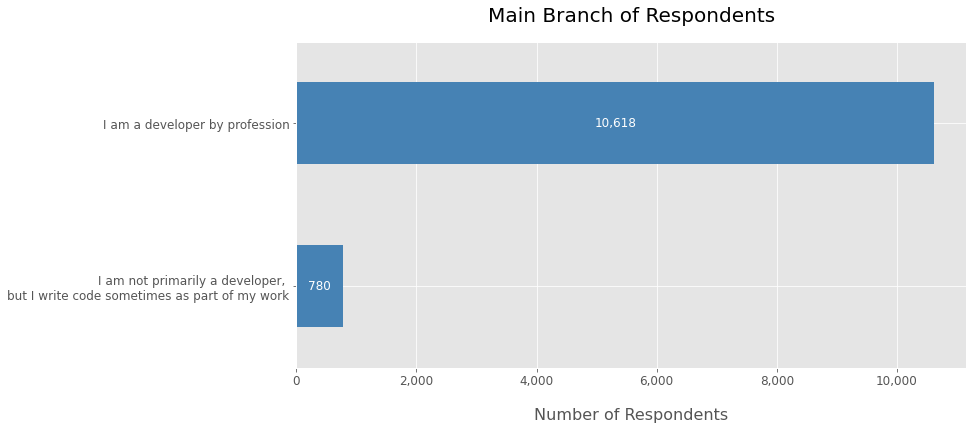

In [50]:
# SQL Query
QUERY = """
SELECT 
    MainBranch, 
    COUNT(MainBranch) AS Number_of_Respondents 
FROM master
GROUP BY MainBranch
ORDER BY Number_of_Respondents
"""
# Create dataframe
df_MainBranch = pd.read_sql_query(QUERY, conn)
df_MainBranch.set_index(keys='MainBranch', inplace=True)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,6))

df_MainBranch.plot(kind='barh', legend=None, color='steelblue', ax=ax)

ax.set_title('Main Branch of Respondents', fontsize=20, pad=20)
ax.set_xlabel('Number of Respondents', fontsize=16, labelpad=20)
ax.set_ylabel(None)

ax.tick_params(axis='both', labelsize=12)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

# Divide long y ticks into two lines
y_label = ['I am not primarily a developer, \nbut I write code sometimes as part of my work', 
           'I am a developer by profession']
ax.set_yticklabels(labels=y_label)

# Add value labels inside the bars
i = 0    
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    labels = f"{df_MainBranch['Number_of_Respondents'][i]:,}"
    
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, labels, ha='center', va='center', fontsize=12, color='white')
    i += 1

plt.show()

Close the database connection.

In [51]:
conn.close()

<br>

## 7. Data Visualization Part II: Tableau Dashboard

We used Tableau to create an interactive dashboard to summarize
1. Current Technology Usage
2. Future Technology Trend
3. Demographics of Respondents

Link to the Tableau Public: **[Data Visualization Part II: Current Technology Usage, Future Technology Trend & Demographics of Respondents](https://public.tableau.com/app/profile/yan.chyi/viz/DataVisualizationPartIICurrentTechnologyUsageFutureTechnologyTrendDemographicsofRespondents/CurrentTechnologyUsage)**<br><br>

## 8. Data Visualization Part III: Data from Other Sources

In this section, we used data other than the Stack Overflow Annual Developer Survey 2019 data to create two additional visualizations.

**1. Plot a bar chart of the number of job postings for selected popular programming languages.**
<br>&emsp;Data source: Collected job postings data from the Jobs API provided by IBM.


**2. Plot a bar chart of average annual salaries for popular programming languages.**
<br>&emsp;Data source: Scrapped salaries data of popular programming languages from the webpage provided by IBM.
<br>
<br>

### 8.1 Collecting Job Postings Data using Jobs API

The following [Jobs API Jupyter Notebook](https://nbviewer.org/github/YanChyi/Data-Analyst-Portfolio-Projects/blob/main/Stack%20Overflow%20Developer%20Survey%202019/Jupyter%20Notebook/Jobs%20API.ipynb) is executed before proceeding to collect job postings data.

We collected the number of job postings for the following programming languages using the Jobs API:

*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL
*   PostgreSQL
*   MongoDB


Function to get the number of jobs for a given technology.

In [52]:
api_url="http://127.0.0.1:5000/data"

def get_number_of_jobs_T(technology):
    
    number_of_jobs = 0

    payload = {"Key Skills": technology}
    response = requests.get(api_url, params = payload)
    
    if response.ok:
        data = response.json()
        number_of_jobs += len(data)
    else:
        number_of_jobs += len(data)
    
    return technology, number_of_jobs

Call the function for Python and check if it works.

In [53]:
get_number_of_jobs_T("Python")

('Python', 1173)

Collect the number of job postings for all the given programming languages above and store the results in an excel sheet.

In [54]:
# List of selected programming languages
languages_list = ["C#", "C++", "Java", "JavaScript", "Python", "Scala", "Oracle", 
                  "SQL Server", "MySQL", "PostgreSQL", "MongoDB"]
                     
# Create a workbook and select the active worksheet
wb = Workbook()
ws = wb.active

# Add first row with column name
ws.append(["Languages", "Number of Jobs Postings"])

# Add rows with programming languages name and the number of jobs postings
for lang in languages_list:
    ws.append(list(get_number_of_jobs_T(lang)))

# Save into an excel spreadsheet named 'job-postings-languages.xlsx'
wb.save("job_postings_languages.xlsx")

Load the excel sheet into a dataframe for plotting.

In [55]:
df_language = pd.read_excel("job_postings_languages.xlsx", engine='openpyxl', index_col='Languages' )
df_language.sort_values(by='Number of Jobs Postings', ascending=False, inplace=True)

Check the dataframe.

In [56]:
df_language

,Number of Jobs Postings
Languages,
Java,2609
Python,1173
Oracle,784
MySQL,751
JavaScript,355
C#,333
C++,305
SQL Server,250
MongoDB,174


<br>

**Bar chart of the number of job postings for selected popular programming languages.**

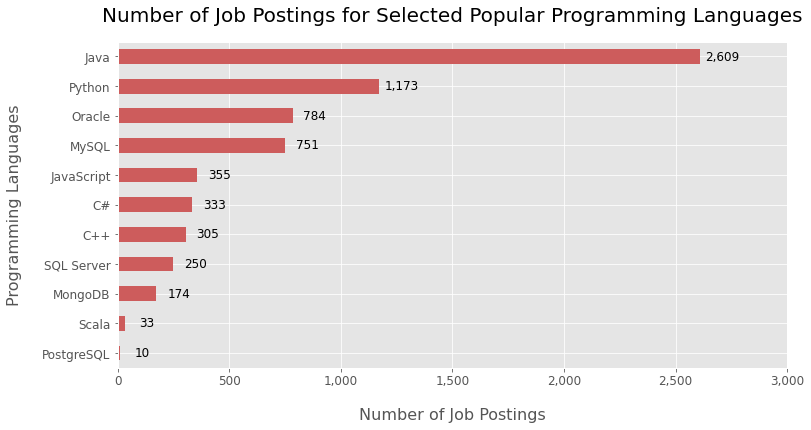

In [57]:
# Sort the dataframe in ascending order
df_language.sort_values(by='Number of Jobs Postings', inplace=True)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,6))

df_language.plot(kind='barh', color='indianred', legend=None, ax=ax)

ax.set_title('Number of Job Postings for Selected Popular Programming Languages', fontsize=20, pad=20)
ax.set_xlabel('Number of Job Postings', fontsize=16, labelpad=20)
ax.set_ylabel('Programming Languages', fontsize=16, labelpad=20)

ax.tick_params(axis='both', labelsize=12)
ax.set_xlim(0,3000)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add value labels
i = 0    
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    labels = f"{df_language['Number of Jobs Postings'][i]:,}"
    
    label_x = width + 100
    label_y = y + height / 2
    ax.text(label_x, label_y, labels, ha='center', va='center', fontsize=12, color='black')
    i += 1

plt.show()

<br>

### 8.2 Web Scraping the Popular Programming Languages and Respective Salaries Data

We scrape the **name of the programming language** and **average annual salary** from the website provided by IBM.<br>

Extract the data from the below website.

In [58]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

Download the webpage at the url.

In [59]:
data = requests.get(url).text

Create a soup object.

In [60]:
soup = BeautifulSoup(data, "html5lib")

Scrape the `Programming Language` and `Annual Average Salary` and store the results in a dataframe.

In [61]:
# find a html table in the web page
table = soup.find('table')

# Create the list of language name and annual average salary
list_language = []
list_salary = []

# Get all rows from the table
for row in table.find_all('tr'):
    
    # Get all columns in each row
    cols = row.find_all('td')
    
    if (cols != []):

        # Store the value in column 2 into list_language
        list_language.append(cols[1].getText())
    
        # Store the value in column 4 into list_salary
        list_salary.append(cols[3].getText())

# Create the salary dataframe
df_salary = pd.DataFrame({"Programming Language":list_language[1:], "Annual Average Salary":list_salary[1:]})
df_salary.set_index("Programming Language", inplace=True)

# Remove the dollar signs and commas
df_salary['Annual Average Salary'] = df_salary['Annual Average Salary'].replace({'\$': '', ',': ''}, regex=True)

# Convert into integer
df_salary['Annual Average Salary'] = df_salary['Annual Average Salary'].astype(int)

# Sort the dataframe
df_salary.sort_values(by='Annual Average Salary', ascending=False, inplace=True)

# Check the dataframe
df_salary

,Annual Average Salary
Programming Language,
Swift,130801
Python,114383
C++,113865
Javascript,110981
Java,101013
Go,94082
R,92037
C#,88726
SQL,84793


<br>

**Bar chart of average annual salaries for popular programming languages.**

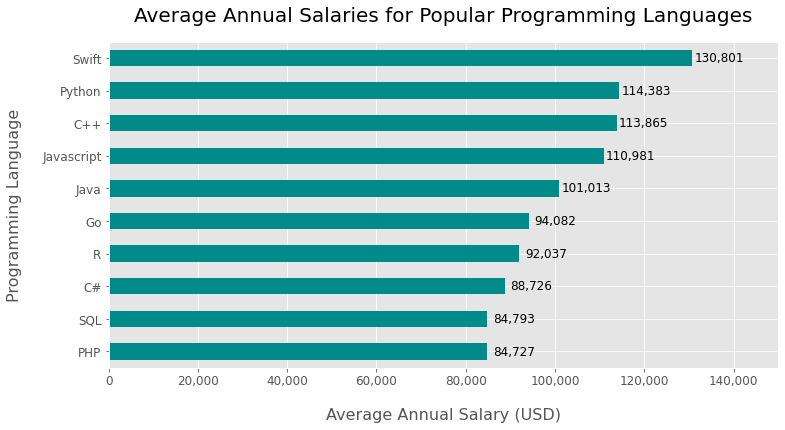

In [62]:
# Sort the dataframe in ascending order
df_salary.sort_values(by='Annual Average Salary', inplace=True)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,6))

df_salary.plot(kind='barh', color='darkcyan', legend=None, ax=ax)

ax.set_title('Average Annual Salaries for Popular Programming Languages', fontsize=20, pad=20)
ax.set_xlabel('Average Annual Salary (USD)', fontsize=16, labelpad=20)
ax.set_ylabel('Programming Language', fontsize=16, labelpad=20)
ax.tick_params(axis='both', labelsize=12)
ax.set_xlim(0,150000)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add value labels inside the bars
i = 0    
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    labels = f"{df_salary['Annual Average Salary'][i]:,}"
    
    label_x = width + 6000
    label_y = y + height / 2
    ax.text(label_x, label_y, labels, ha='center', va='center', fontsize=12, color='black')
    i += 1

plt.show()

## 9. Findings and Implications

The analysis has yielded the following questions:
1. What are the top technologies in demand?
2. What technologies should the developers, students, businesses, and educators emphasize more?
3. What are the demographics and salaries of the developers?

To summarize:<br><br>

**Findings**
- JavaScript and HTML/CSS are the most commonly used and desired programming languages, while TypeScript is also gaining interest among developers.
- Python is gaining popularity among developers.
- MySQL is the most commonly used database in 2019, while PostgreSQL and MongoDB are gaining interest among developers.
- Despite the median salary of women developers being slightly higher than men developers, there remains a high gender gap between men and women developers, which is in favour of men developers.

**Implications**
- Skilled web developers still present a high demand in the market. Current and prospective developers should consider learning TypeScript in addition to JavaScript and HTML/CSS.
- With the increasing need for data professionals to handle and analyze big data, current and prospective developers should continually enhance their skills in SQL and Python.
- There is a possible boom in NoSQL adoption in the future. The current and prospective developers should develop their NoSQL skills to maintain their competence in the market.
- Businesses should put effort into bridging the gender gap among developers to create diverse and inclusive workplaces.

*Note: More in-depth findings and implications were discussed in the presentation slides. __[Link to presentation slides](https://github.com/YanChyi/Data-Analyst-Portfolio-Projects/blob/main/Stack%20Overflow%20Developer%20Survey%202019/Stack%20Overflow%20Developer%20Survey%202019%20-%20Presentation.pdf)__*

## Thank you!

Created by Koh Yan Chyi